In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import tensorflow as tf

In [ ]:
network = Sequential([
    Conv2D(32,(3,3),activation = 'relu',input_shape = (150,150,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout((0.5)),
    Dense(units=512,activation = 'relu'),
    Dense(units = 1,activation = 'sigmoid')
])

In [ ]:
network.compile(loss = 'binary_crossentropy',metrics = ['accuracy'],optimizer = tf.keras.optimizers.RMSprop(learning_rate = 1e-4))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(rescale = 1./255)
test_generator = ImageDataGenerator(rescale = 1./255)

In [ ]:
! unrar x 'small_dataset.rar'


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from small_dataset.rar


Would you like to replace the existing file small_dataset/test/cats/1500.jpg
 18613 bytes, modified on 2022-07-06 15:46
with a new one
 18613 bytes, modified on 2022-07-06 15:46

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit N


Would you like to replace the existing file small_dataset/test/cats/1501.jpg
 14883 bytes, modified on 2022-07-06 15:46
with a new one
 14883 bytes, modified on 2022-07-06 15:46

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit Q

Program aborted


In [ ]:
train_dataset = train_generator.flow_from_directory('small_dataset/train',target_size=(150,150),batch_size = 20, class_mode='binary')
validation_dataset = test_generator.flow_from_directory('small_dataset/validation',target_size=(150,150),batch_size = 20,class_mode='binary')
test_dataset = test_generator.flow_from_directory('small_dataset/test',target_size = (150,150),batch_size=20,class_mode = 'binary')

Found 1999 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = network.fit_generator(train_dataset,steps_per_epoch = 100,epochs = 30,validation_data = validation_dataset,validation_steps=30)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


100/100 [==============================] - 105s 1s/step - loss: 0.6903 - accuracy: 0.5123 - val_loss: 0.6717 - val_accuracy: 0.5850
Epoch 2/30
100/100 [==============================] - 104s 1s/step - loss: 0.6679 - accuracy: 0.5983 - val_loss: 0.6373 - val_accuracy: 0.6400
Epoch 3/30
100/100 [==============================] - 104s 1s/step - loss: 0.6253 - accuracy: 0.6463 - val_loss: 0.6364 - val_accuracy: 0.6433
Epoch 4/30
100/100 [==============================] - 104s 1s/step - loss: 0.5914 - accuracy: 0.6788 - val_loss: 0.6127 - val_accuracy: 0.6583
Epoch 5/30
100/100 [==============================] - 105s 1s/step - loss: 0.5572 - accuracy: 0.7144 - val_loss: 0.5849 - val_accuracy: 0.6983
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5404 - accuracy: 0.7189 - val_loss: 0.5649 - val_accuracy: 0.7083
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.5191 - accuracy: 0.7389 - val_loss: 0.5882 - val_accuracy: 0.6783
Epoch 8/30

In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path("small_dataset/test/dogs").rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
loss = history_dict['loss']
acc = history_dict['accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_accuracy']

In [ ]:
import matplotlib.pyplot as plt
epoch = range(1,len(loss)+1)

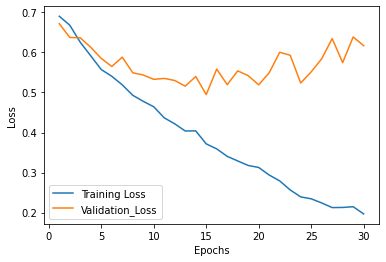

In [ ]:
plt.plot(epoch,loss,label = 'Training Loss')
plt.plot(epoch,val_loss,label = 'Validation_Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

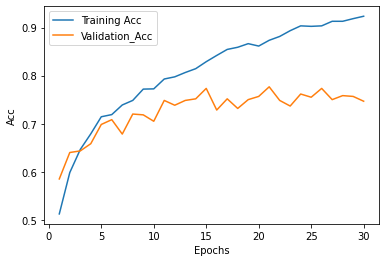

In [ ]:
plt.plot(epoch,acc,label = 'Training Acc')
plt.plot(epoch,val_acc,label = 'Validation_Acc')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.show()

In [ ]:
network.save('Cats_vs_Dogs_1.h5')

In [ ]:
# Overfitting : Data Augmentator for Dealign with the same, Which is basically imagedatagenerator

In [ ]:
 datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [ ]:
network.save('/content/CVD_!.h5')

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
img = image.load_img('1.jpg',target_size = (150,150))

In [ ]:
img = image.img_to_array(img)

In [ ]:
img.shape

(150, 150, 3)

In [ ]:
import numpy as np

In [ ]:
img = np.expand_dims(img,axis = 0)

In [ ]:
img.shape
i = 0
import matplotlib.pyplot as plt

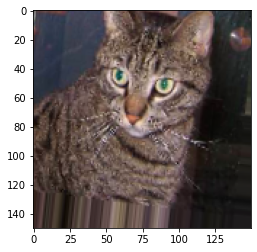

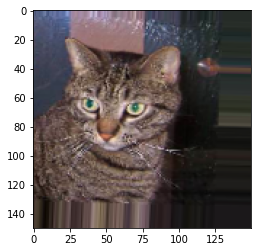

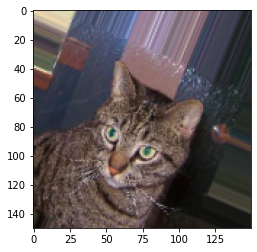

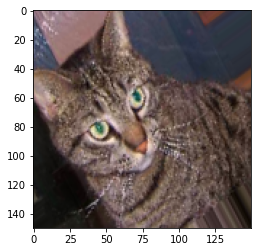

In [ ]:
for batch in datagen.flow(img,batch_size=1):
  plt.figure(i)
  plt.imshow(image.array_to_img(batch[0]))
  i+=1
  plt.show()
  if i ==4:
    break

In [ ]:
network_2 = Sequential([
    Conv2D(32,(3,3),input_shape=(150,150,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dropout((0.5)),
    Dense(512,activation = 'relu'),
    Dense(1,activation = 'sigmoid')
])
network_2.compile(loss = 'binary_crossentropy',optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-4),metrics =['accuracy'])

In [ ]:
train_datagen_2 = ImageDataGenerator(rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)

In [ ]:
test_datagen_2 = ImageDataGenerator(rescale = 1./255)

In [72]:
train_dataset_2 = train_datagen_2.flow_from_directory('training',class_mode = 'binary',batch_size = 32,target_size = (150,150))

Found 3994 images belonging to 2 classes.


In [73]:
val_dataset_2 = test_datagen_2.flow_from_directory('validation',batch_size = 32,target_size = (150,150),class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [86]:
test_dataset_2 = test_datagen_2.flow_from_directory('test',batch_size = 32,target_size = (150,150),class_mode = 'binary')

Found 999 images belonging to 2 classes.


In [89]:
history_2 = network_2.fit_generator(train_dataset_2,steps_per_epoch = 100,epochs = 100,validation_data = val_dataset_2,validation_steps= 25)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
100/100 [==============================] - 171s 2s/step - loss: 0.6943 - accuracy: 0.5178 - val_loss: 0.6802 - val_accuracy: 0.6175
Epoch 2/100
100/100 [==============================] - 168s 2s/step - loss: 0.6857 - accuracy: 0.5503 - val_loss: 0.6617 - val_accuracy: 0.6187
Epoch 3/100
100/100 [==============================] - 168s 2s/step - loss: 0.6699 - accuracy: 0.5867 - val_loss: 0.6423 - val_accuracy: 0.6112
Epoch 4/100
100/100 [==============================] - 167s 2s/step - loss: 0.6574 - accuracy: 0.6030 - val_loss: 0.6306 - val_accuracy: 0.6237
Epoch 5/100
100/100 [==============================] - 167s 2s/step - loss: 0.6417 - accuracy: 0.6296 - val_loss: 0.6042 - val_accuracy: 0.6525
Epoch 6/100
100/100 [==============================] - 167s 2s/step - loss: 0.6211 - accuracy: 0.6503 - val_loss: 0.5648 - val_accuracy: 0.7025
Epoch 7/100
100/100 [==============================] - 167s 2s/step - loss: 0.6186 - accuracy: 0.6553 - val_loss: 0.5732 - val_accuracy:

In [48]:
import os,shutil

In [53]:
os.getcwd()

'/content'

In [54]:
training_dir = os.path.join(os.getcwd(),'training')
os.mkdir(training_dir)

In [56]:
train_cat = os.path.join(training_dir,'cat')
train_dog = os.path.join(training_dir,'dog')
os.mkdir(train_cat)
os.mkdir(train_dog)

In [57]:
fnames = ['{}.jpg'.format(i) for i in range(0,2000)]

In [58]:
source_path = '/content/sample_data/kagglecatsanddogs_3367a/PetImages/Cat'

In [61]:
for files in fnames:
  src = os.path.join(source_path,files)
  destination = os.path.join(train_cat,files)
  try:
    shutil.copyfile(src,destination)
  except FileNotFoundError:
    pass

In [62]:
source_path = '/content/sample_data/kagglecatsanddogs_3367a/PetImages/Dog'

In [63]:
for files in fnames:
  src = os.path.join(source_path,files)
  destination = os.path.join(train_dog,files)
  try:
    shutil.copyfile(src,destination)
  except FileNotFoundError:
    pass

In [80]:
validation_dir = os.path.join(os.getcwd(),'validation')
os.mkdir(validation_dir)

In [81]:
val_cat = os.path.join(validation_dir,'cat')
val_dog = os.path.join(validation_dir,'dog')
os.mkdir(val_cat)
os.mkdir(val_dog)

In [82]:
fnames = ['{}.jpg'.format(i) for i in range(2000,2500)]

In [68]:
source_path_cat = '/content/sample_data/kagglecatsanddogs_3367a/PetImages/Cat'

In [83]:
for files in fnames:
  src = os.path.join(source_path_cat,files)
  destination = os.path.join(val_cat,files)
  try:
    shutil.copyfile(src,destination)
  except FileNotFoundError:
    pass

In [70]:
source_path_dog = '/content/sample_data/kagglecatsanddogs_3367a/PetImages/Dog'

In [84]:
for files in fnames:
  src = os.path.join(source_path_dog,files)
  destination = os.path.join(val_dog,files)
  try:
    shutil.copyfile(src,destination)
  except FileNotFoundError:
    pass

In [74]:
test_dir = os.path.join(os.getcwd(),'test')
os.mkdir(test_dir)
test_cat = os.path.join(test_dir,'cat')
test_dog = os.path.join(test_dir,'dog')
os.mkdir(test_cat)
os.mkdir(test_dog)

In [75]:
fnames = ['{}.jpg'.format(i) for i in range(2500,3000)]

In [76]:
for files in fnames:
  src = os.path.join(source_path_cat,files)
  destination = os.path.join(test_cat,files)
  try:
    shutil.copyfile(src,destination)
  except FileNotFoundError:
    pass

In [77]:
for files in fnames:
  src = os.path.join(source_path_dog,files)
  destination = os.path.join(test_dog,files)
  try:
    shutil.copyfile(src,destination)
  except FileNotFoundError:
    pass

In [79]:
shutil.rmtree('validation')